In [47]:
import pandas as pd

In [48]:
df = pd.read_csv("Obesity Classification.csv")

In [49]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [50]:
df.shape

(108, 7)

In [51]:
df.isna().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [52]:
df.describe()


,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [53]:
import seaborn as sns

<Axes: xlabel='Age'>

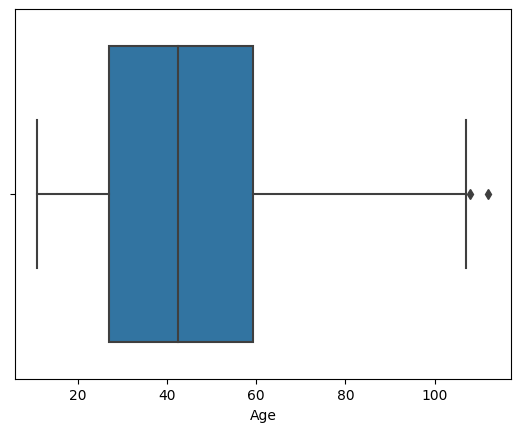

In [54]:
sns.boxplot(x="Age",data=df)


In [55]:
df["Age"].unique()

array([ 25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  18,  23,  28,
        33,  38,  43,  48,  53,  58,  63,  68,  73,  78,  83,  88,  93,
        98, 103, 108,  19,  24,  29,  39,  44,  49,  54,  59,  64,  17,
        22,  27,  32,  37,  42,  47,  52,  57,  62,  67,  72,  77,  82,
        87,  92,  97, 102, 107, 112,  16,  21,  26,  31,  36,  41,  46,
        51,  56,  61,  15,  20,  14,  34,  13,  12,  11], dtype=int64)

<Axes: xlabel='Height'>

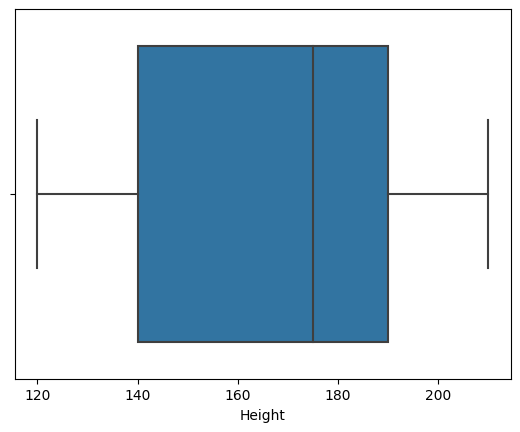

In [56]:
sns.boxplot(x="Height",data=df)

<Axes: xlabel='BMI'>

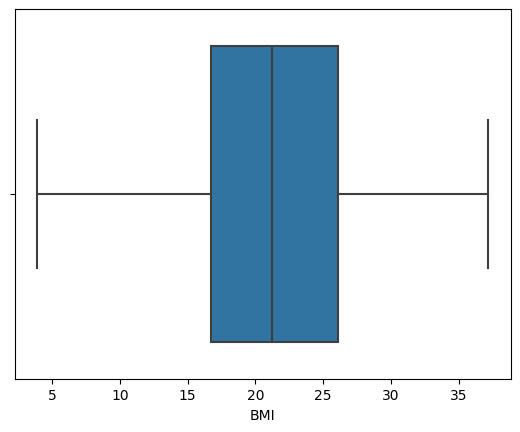

In [57]:
sns.boxplot(x="BMI",data=df)

<Axes: xlabel='Label', ylabel='count'>

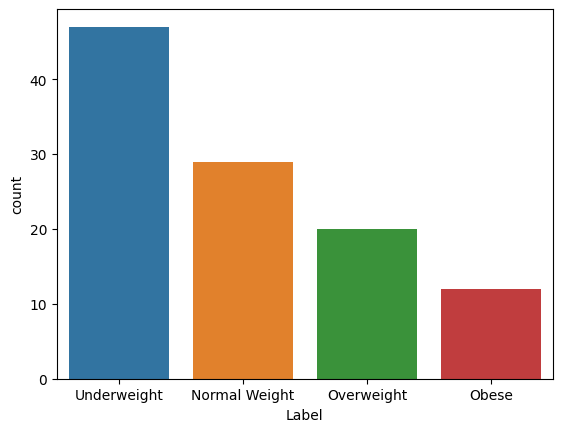

In [58]:
sns.barplot(x=df.Label.value_counts().index, y=df.Label.value_counts())

In [59]:
df["Height"].dtype

dtype('int64')

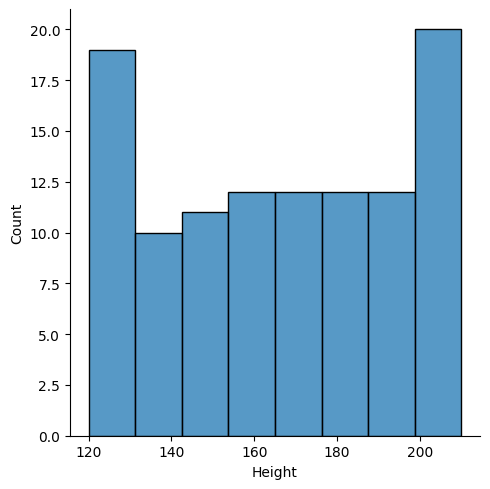

In [60]:
sns.displot(df["Height"])

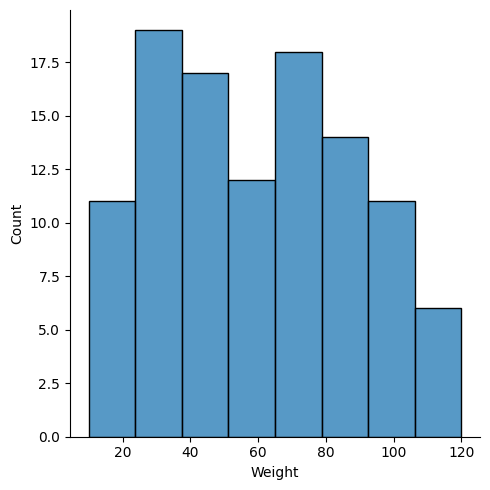

In [61]:
sns.displot(df["Weight"])

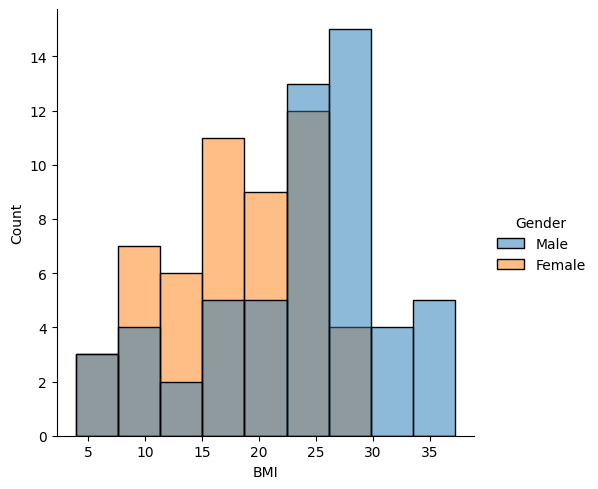

In [62]:

sns.displot(data=df, x="BMI", hue="Gender")

Males seem to have higher BMI

We will create Logistic Regression model to predict if a person will be over weight or not

In [63]:
df['Label'] = df['Label'].apply(lambda x: 1 if x=="Overweight" else 0)

In [64]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,0
1,2,30,Female,160,60,22.5,0
2,3,35,Male,180,90,27.3,1
3,4,40,Female,150,50,20.0,0
4,5,45,Male,190,100,31.2,0


<Axes: xlabel='Label', ylabel='count'>

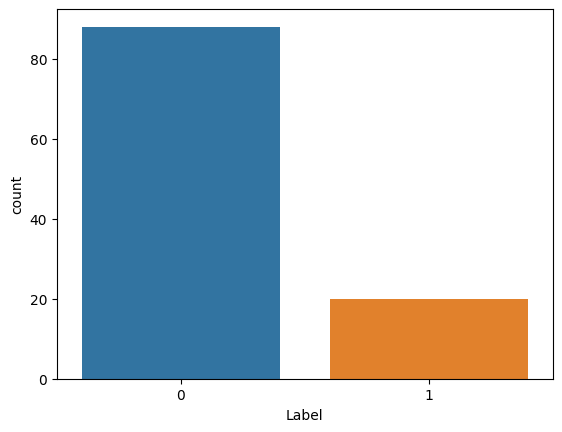

In [65]:
sns.barplot(x=df.Label.value_counts().index, y=df.Label.value_counts())

In [147]:
Obese = df[df["Label"] == 1]
NotObese = df[df["Label"] == 0]

In [149]:
Obese.shape

(20, 8)

In [150]:
NotObese.shape

(88, 8)

In [151]:
# upsample minority class
Obese_upsampled = df.resample(Obese,replace=True,    # sample with replacement
                                 n_samples= 88, # to match majority class
                                 random_state=42)  # reproducible results

In [152]:
Obese_upsampled.shape

(88, 8)

Now data imbalance is handled, lets join them

In [153]:
df_upsampled = pd.concat([Obese_upsampled,NotObese])

There is data imbalance that needs to be handled

In [154]:
df_upsampled

,ID,Age,Height,Weight,BMI,Label,Female,Male
35,38,54,130,85,27.5,1,1,0
76,79,55,210,85,26.1,1,0,1
55,58,102,130,75,25.0,1,1,0
45,48,52,130,75,25.0,1,1,0
37,40,64,120,95,29.1,1,1,0
...,...,...,...,...,...,...,...,...
103,106,11,175,10,3.9,0,0,1
104,107,16,160,10,3.9,0,1,0
105,108,21,180,15,5.6,0,0,1
106,109,26,150,15,5.6,0,1,0


In [155]:
df_upsampled.shape

(176, 8)

<Axes: xlabel='Label', ylabel='count'>

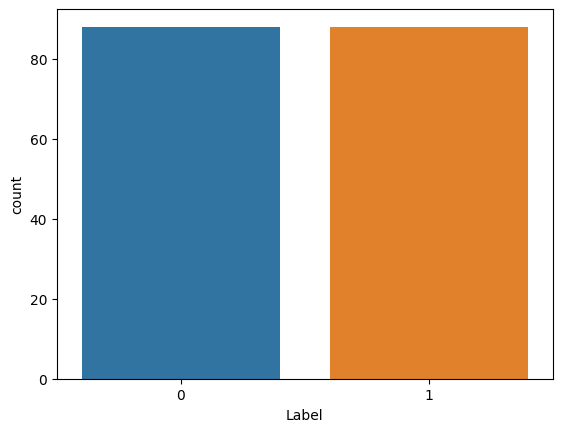

In [156]:
sns.barplot(x=df_upsampled.Label.value_counts().index, y=df_upsampled.Label.value_counts())

In [251]:
X = df_upsampled[["Age","Height","Weight","BMI","Female","Male"]]

In [252]:
y = df_upsampled["Label"]

In [253]:
X.head()

,Age,Height,Weight,BMI,Female,Male
35,54,130,85,27.5,1,0
76,55,210,85,26.1,0,1
55,102,130,75,25.0,1,0
45,52,130,75,25.0,1,0
37,64,120,95,29.1,1,0


In [254]:
y.head()

35    1
76    1
55    1
45    1
37    1
Name: Label, dtype: int64

In [255]:
from sklearn.model_selection import train_test_split

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [257]:
X_train

,Age,Height,Weight,BMI,Female,Male
88,38,140,35,16.7,1,0
55,102,130,75,25.0,1,0
21,73,160,60,22.5,1,0
91,53,210,55,21.2,0,1
50,77,180,75,24.2,0,1
...,...,...,...,...,...,...
17,53,130,40,16.7,1,0
57,112,120,85,27.5,1,0
36,59,210,115,30.8,0,1
64,46,200,85,26.1,0,1


In [258]:
X_test

,Age,Height,Weight,BMI,Female,Male
44,47,200,95,27.0,0,1
81,29,150,30,13.3,1,0
55,102,130,75,25.0,1,0
31,29,180,85,26.1,0,1
43,42,140,65,22.7,1,0
15,43,140,50,20.0,1,0
45,52,130,75,25.0,1,0
90,48,130,40,16.7,1,0
58,16,175,55,21.2,0,1
1,30,160,60,22.5,1,0


In [259]:
y_train

88     0
55     1
21     0
91     0
50     0
      ..
17     0
57     1
36     0
64     1
104    0
Name: Label, Length: 123, dtype: int64

In [260]:
y_test

44     1
81     0
55     1
31     1
43     0
15     0
45     1
90     0
58     0
1      0
70     0
75     0
35     1
10     0
98     0
6      0
66     1
47     1
54     1
31     1
37     1
42     1
37     1
48     0
31     1
25     0
49     0
85     0
26     0
94     0
76     1
66     1
65     0
22     1
45     1
55     1
37     1
23     0
11     0
107    0
67     1
35     1
5      0
27     0
89     0
64     1
62     0
52     1
78     0
2      1
18     0
38     0
55     1
Name: Label, dtype: int64

In [261]:
y_train

88     0
55     1
21     0
91     0
50     0
      ..
17     0
57     1
36     0
64     1
104    0
Name: Label, Length: 123, dtype: int64


Now the imbalance is rectified. Now we can perform Logistic Regression.

In [262]:
from sklearn.linear_model import LogisticRegression

In [263]:
logreg = LogisticRegression(random_state=16,max_iter=1000)

We have gender as a categorical value , hence we need to convert that to numerical. Since it has only few categories we can use 
One Hot encoding

In [264]:
X_train

,Age,Height,Weight,BMI,Female,Male
88,38,140,35,16.7,1,0
55,102,130,75,25.0,1,0
21,73,160,60,22.5,1,0
91,53,210,55,21.2,0,1
50,77,180,75,24.2,0,1
...,...,...,...,...,...,...
17,53,130,40,16.7,1,0
57,112,120,85,27.5,1,0
36,59,210,115,30.8,0,1
64,46,200,85,26.1,0,1


In [265]:
y_test.shape


(53,)

In [266]:
X_test.shape

(53, 6)

In [267]:
# fit the model with data
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

In [268]:
y_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [269]:
from sklearn.metrics import confusion_matrix

In [270]:
confusion_matrix(y_test, y_pred)

array([[24,  4],
       [ 3, 22]], dtype=int64)

In [271]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test, y_pred))

[[24  4]
 [ 3 22]]
0.8679245283018868


In [272]:
X_test

,Age,Height,Weight,BMI,Female,Male
44,47,200,95,27.0,0,1
81,29,150,30,13.3,1,0
55,102,130,75,25.0,1,0
31,29,180,85,26.1,0,1
43,42,140,65,22.7,1,0
15,43,140,50,20.0,1,0
45,52,130,75,25.0,1,0
90,48,130,40,16.7,1,0
58,16,175,55,21.2,0,1
1,30,160,60,22.5,1,0


In [282]:
y_pred_1 = logreg.predict([[30,150,150,15,1,1]])

C:\Users\shara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [281]:
y_pred_1

array([1], dtype=int64)

In [283]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8679245283018868
